In [10]:
import pandas as pd
import matplotlib as mt

In [3]:
#Import Excel file
url = 'https://raw.githubusercontent.com/rubisabel00/ciencias-de-datos-Sena/refs/heads/main/DocumentosNB03/clientes.csv'
datasetExcelURL = pd.read_csv(url)

# Extract 5 first data
datasetExcelURL.head()

,ID del cliente,Nombre,Última fecha de compra,Frecuencia de compra,Valor promedio de la compra,Categoría de productos comprados,Método de pago,Edad
0,1,Juan Perez,15/03/2022,5,200.5,Ropa,Tarjeta de crédito,32.0
1,2,Ana Rodriguez,01/04/2022,2,80.0,Juguetes,Efectivo,45.0
2,3,Luisa Hernandez,10/12/2021,3,150.2,Electrónica,Transferencia bancaria,28.0
3,4,Carlos Garcia,28/02/2022,1,300.0,Alimentos,Tarjeta de crédito,50.0
4,5,Maria Gomez,20/03/2022,4,75.8,Ropa,Efectivo,22.0


In [4]:
# Data info 
datasetExcelURL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID del cliente                    157 non-null    int64  
 1   Nombre                            155 non-null    object 
 2   Última fecha de compra            156 non-null    object 
 3   Frecuencia de compra              157 non-null    int64  
 4   Valor promedio de la compra       152 non-null    float64
 5   Categoría de productos comprados  151 non-null    object 
 6   Método de pago                    153 non-null    object 
 7   Edad                              154 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 9.9+ KB


In [5]:
# Delete null data on fields
no_nulls = datasetExcelURL.dropna()
no_nulls

,ID del cliente,Nombre,Última fecha de compra,Frecuencia de compra,Valor promedio de la compra,Categoría de productos comprados,Método de pago,Edad
0,1,Juan Perez,15/03/2022,5,200.5,Ropa,Tarjeta de crédito,32.0
1,2,Ana Rodriguez,01/04/2022,2,80.0,Juguetes,Efectivo,45.0
2,3,Luisa Hernandez,10/12/2021,3,150.2,Electrónica,Transferencia bancaria,28.0
3,4,Carlos Garcia,28/02/2022,1,300.0,Alimentos,Tarjeta de crédito,50.0
4,5,Maria Gomez,20/03/2022,4,75.8,Ropa,Efectivo,22.0
...,...,...,...,...,...,...,...,...
152,160,Andrea Soto,09/06/2022,2,50.0,Electrónica,Transferencia bancaria,25.0
153,161,Laura Hernandez,06/06/2022,1,120.0,Alimentos,Efectivo,39.0
154,145,Luis Garcia,04/06/2022,4,75.2,Alimentos,Transferencia bancaria,28.0
155,154,Luisa Perez,08/06/2022,2,80.0,Ropa,Transferencia bancaria,33.0


In [ ]:
# statistical info
no_nulls.describe()

,ID del cliente,Frecuencia de compra,Valor promedio de la compra,Edad
count,142.000000,142.000000,142.000000,142.000000
mean,83.070423,2.338028,119.960211,31.471831
std,48.192823,1.166235,258.158709,9.329047
min,1.000000,1.000000,20.000000,1.000000
25%,41.250000,1.000000,65.225000,26.000000
50%,84.500000,2.000000,85.100000,30.000000
75%,125.750000,3.000000,120.300000,37.000000
max,161.000000,5.000000,3110.000000,80.000000


Axes(0.125,0.11;0.775x0.77)


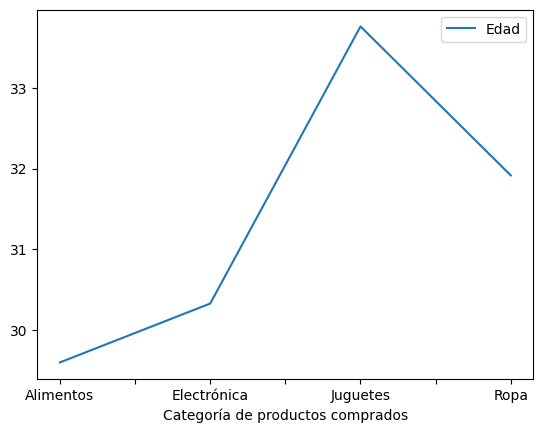

In [12]:
# # Create table pivot
table_pivot = no_nulls.pivot_table(
    values='Edad', 
    index='Categoría de productos comprados',
    aggfunc='mean'
)

# Chart
print(table_pivot.plot())

In [13]:
#Cantidad de clientes por edad
age = no_nulls.groupby('Edad').agg({'Edad': 'count'})
print(age)

      Edad
Edad      
1.0      1
2.0      1
3.0      1
19.0     1
20.0     1
21.0     5
22.0     4
23.0     3
24.0     7
25.0     6
26.0     9
27.0     9
28.0    10
29.0    10
30.0     5
31.0     8
32.0     5
33.0     7
34.0     4
35.0     3
36.0     4
37.0     6
38.0     4
39.0     4
40.0     1
41.0     3
42.0     5
43.0     4
44.0     2
45.0     3
46.0     1
47.0     1
48.0     1
50.0     1
54.0     1
80.0     1


In [14]:
products_name = no_nulls.groupby(['Nombre','Valor promedio de la compra']).agg({'Valor promedio de la compra': 'min'})
print(products_name)

                                              Valor promedio de la compra
Nombre           Valor promedio de la compra                             
Alberto Ortiz    85.0                                                85.0
Alberto Torres   50.8                                                50.8
Alejandra Garcia 85.9                                                85.9
Alejandra Torres 65.5                                                65.5
                 180.0                                              180.0
...                                                                   ...
Sofia Mendoza    70.7                                                70.7
Sofia Rodriguez  98.6                                                98.6
Sofia Sanchez    80.0                                                80.0
Sofia Torres     60.0                                                60.0
                 80.2                                                80.2

[139 rows x 1 columns]


In [15]:
# Copy to new file data
new_file = no_nulls.copy()
new_file['Total neto'] = (new_file['Frecuencia de compra'] * new_file['Valor promedio de la compra'])
 
print(new_file.head())

   ID del cliente           Nombre Última fecha de compra  \
0               1       Juan Perez             15/03/2022   
1               2    Ana Rodriguez             01/04/2022   
2               3  Luisa Hernandez             10/12/2021   
3               4    Carlos Garcia             28/02/2022   
4               5      Maria Gomez             20/03/2022   

   Frecuencia de compra  Valor promedio de la compra  \
0                     5                        200.5   
1                     2                         80.0   
2                     3                        150.2   
3                     1                        300.0   
4                     4                         75.8   

  Categoría de productos comprados          Método de pago  Edad  Total neto  
0                             Ropa      Tarjeta de crédito  32.0      1002.5  
1                         Juguetes                Efectivo  45.0       160.0  
2                      Electrónica  Transferencia bancaria 

In [ ]:
# Export csv file
new_file.to_csv('./Datos/newclients.csv', index=False)